In [1]:
# Importing libraries
import numpy as np   
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Election_Data.xlsx', index_col=None)

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
#EDA
df.shape

(1525, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
Unnamed: 0                 1525 non-null int64
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [6]:
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [7]:
df['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [8]:
for feature in df.columns: 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].nunique()))



feature: Unnamed: 0
[1, 2, 3, 4, 5, ..., 1521, 1522, 1523, 1524, 1525]
Length: 1525
Categories (1525, int64): [1, 2, 3, 4, ..., 1522, 1523, 1524, 1525]
[1525]
Categories (1, int64): [1525]


feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[2]
Categories (1, int64): [2]


feature: age
[43, 36, 35, 24, 41, ..., 86, 85, 87, 93, 91]
Length: 70
Categories (70, int64): [24, 25, 26, 27, ..., 90, 91, 92, 93]
[70]
Categories (1, int64): [70]


feature: economic.cond.national
[3, 4, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
[5]
Categories (1, int64): [5]


feature: economic.cond.household
[3, 4, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
[5]
Categories (1, int64): [5]


feature: Blair
[4, 5, 2, 1, 3]
Categories (5, int64): [1, 2, 3, 4, 5]
[5]
Categories (1, int64): [5]


feature: Hague
[1, 4, 2, 5, 3]
Categories (5, int64): [1, 2, 3, 4, 5]
[5]
Categories (1, int64): [5]


feature: Europe
[2, 5, 3, 4, 6, ..., 1, 7, 9, 10, 8]
Length: 11
Categories (

In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [10]:
# Encoding
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


feature: gender
[female, male]
Categories (2, object): [female, male]
[0 1]


In [11]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [13]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [14]:
df.rename(columns = {"economic.cond.national": "national_economic_cond","economic.cond.household": "household_economic_condition","political.knowledge":"politic_knowledge"},inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                            1525 non-null int8
age                             1525 non-null int64
national_economic_cond          1525 non-null int64
household_economic_condition    1525 non-null int64
Blair                           1525 non-null int64
Hague                           1525 non-null int64
Europe                          1525 non-null int64
politic_knowledge               1525 non-null int64
gender                          1525 non-null int8
dtypes: int64(7), int8(2)
memory usage: 86.5 KB


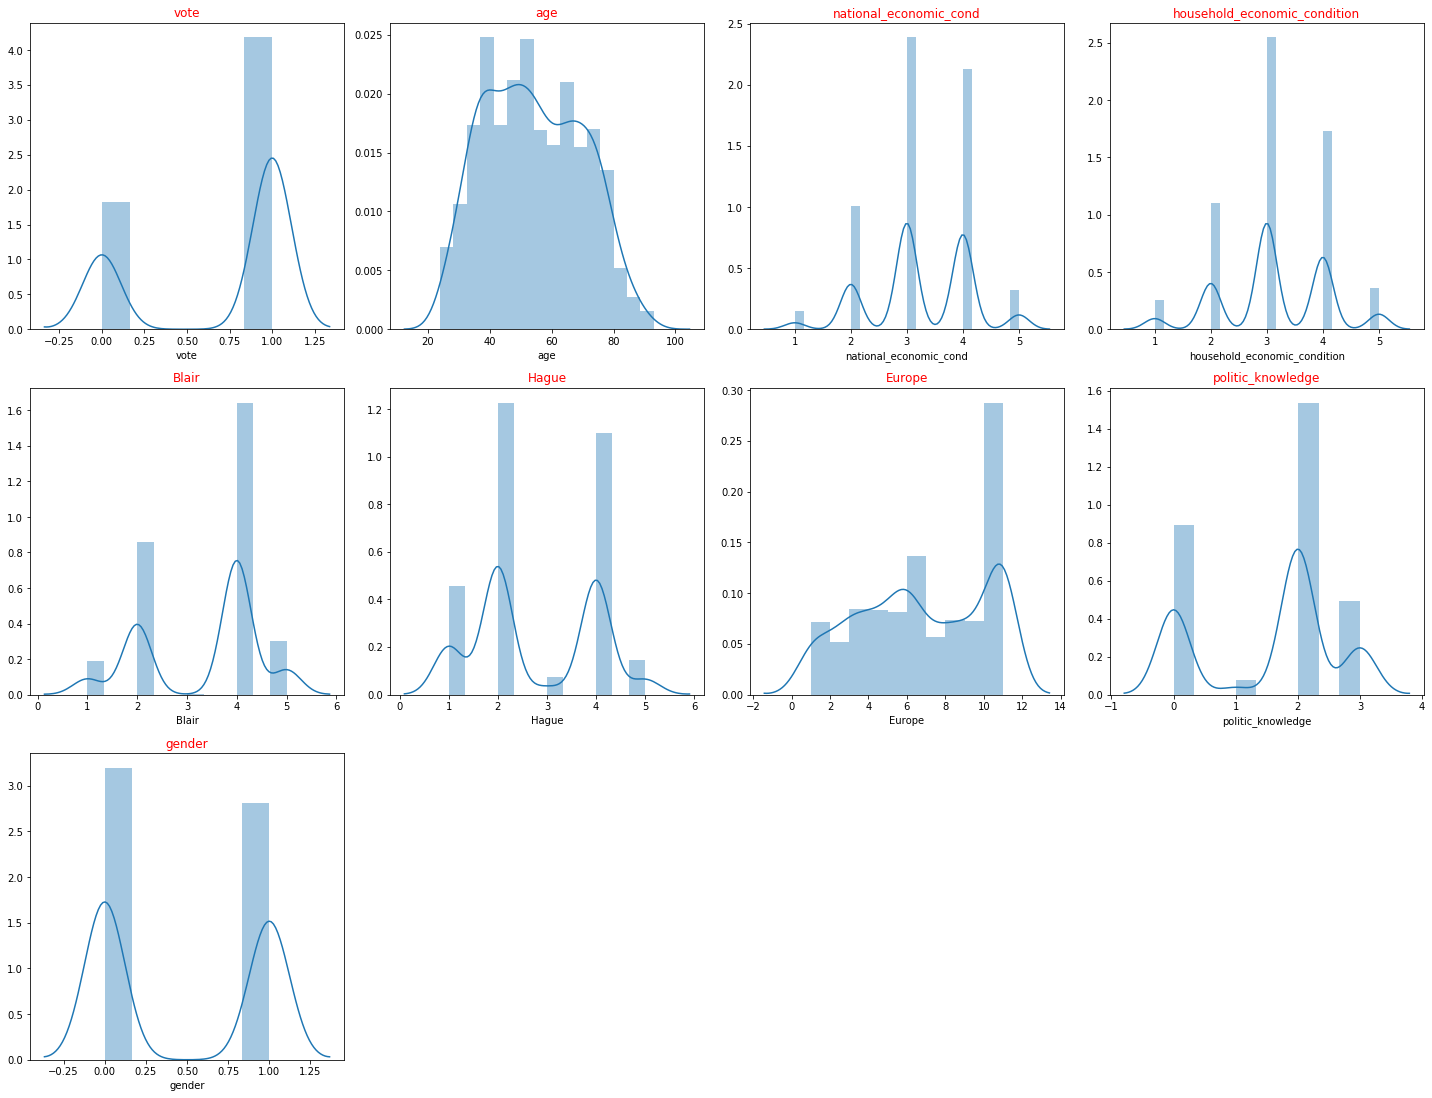

In [16]:
# Univariate Analysis
fig=plt.figure(figsize=(20,20))
for i in range(0,len(df.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(df[df.columns[i]],hist=True)
    ax.set_title(df.columns[i],color='Red')
plt.tight_layout()
plt.savefig('displots for all the variables')
plt.show()

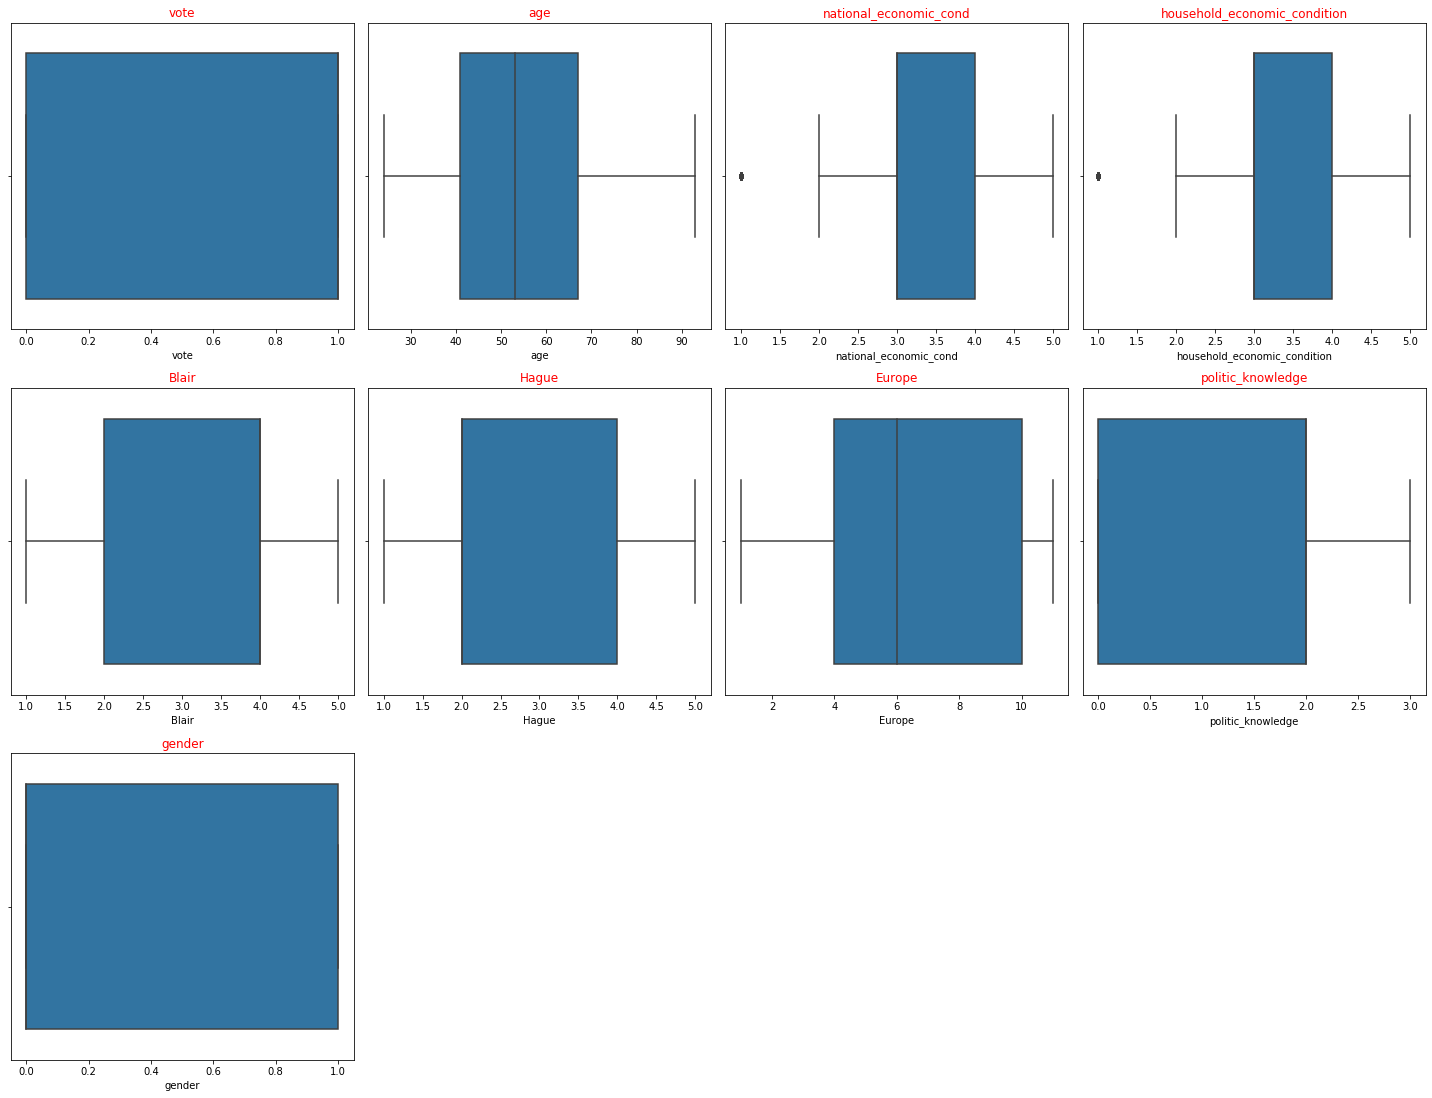

In [17]:
fig=plt.figure(figsize=(20,20))
for i in range(0,len(df.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(df[df.columns[i]])
    ax.set_title(df.columns[i],color='Red')
plt.tight_layout()
plt.show()

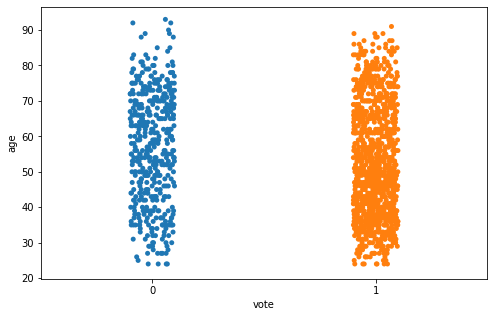

In [18]:
#Bivariate Analysis
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()

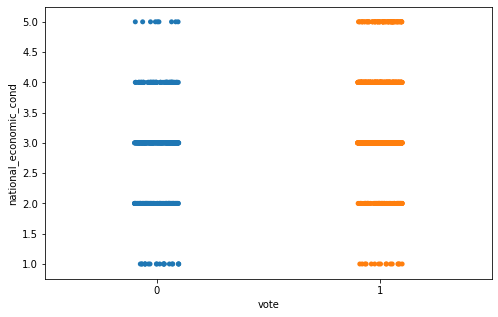

In [19]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['national_economic_cond'], jitter=True) 

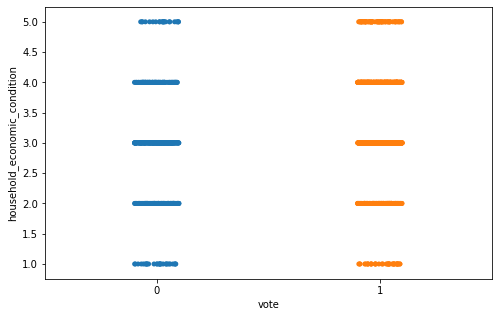

In [20]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['household_economic_condition'], jitter=True) 

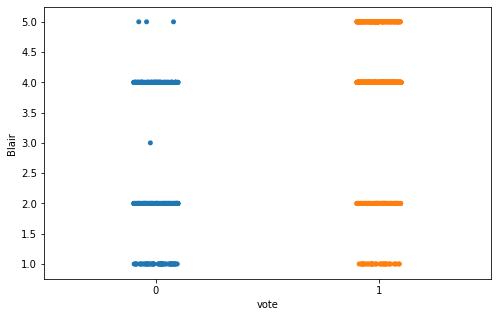

In [21]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Blair'], jitter=True) 

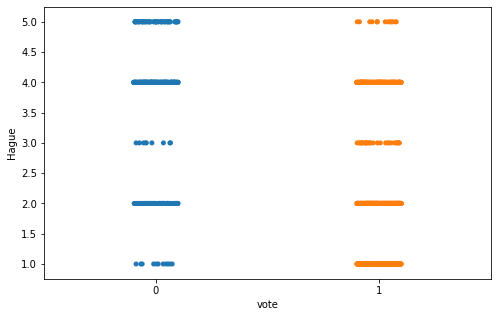

In [22]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Hague'], jitter=True) 

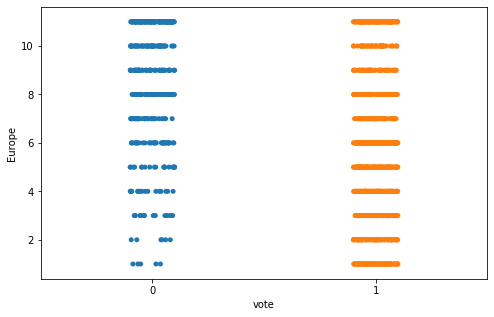

In [23]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 

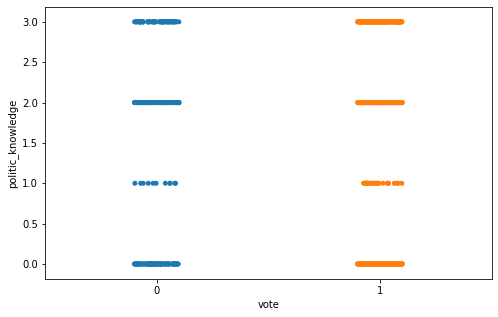

In [24]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['politic_knowledge'], jitter=True) 

In [25]:
# Multivariate Analysis
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes

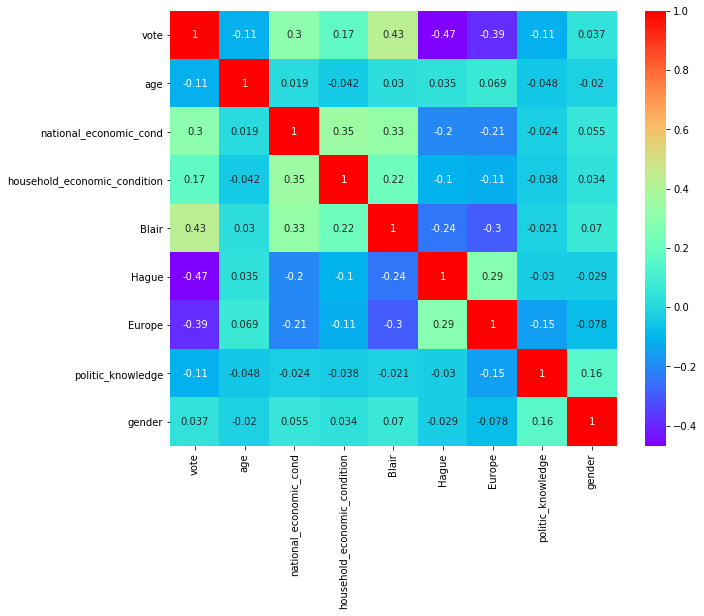

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, cmap='rainbow')
plt.show()

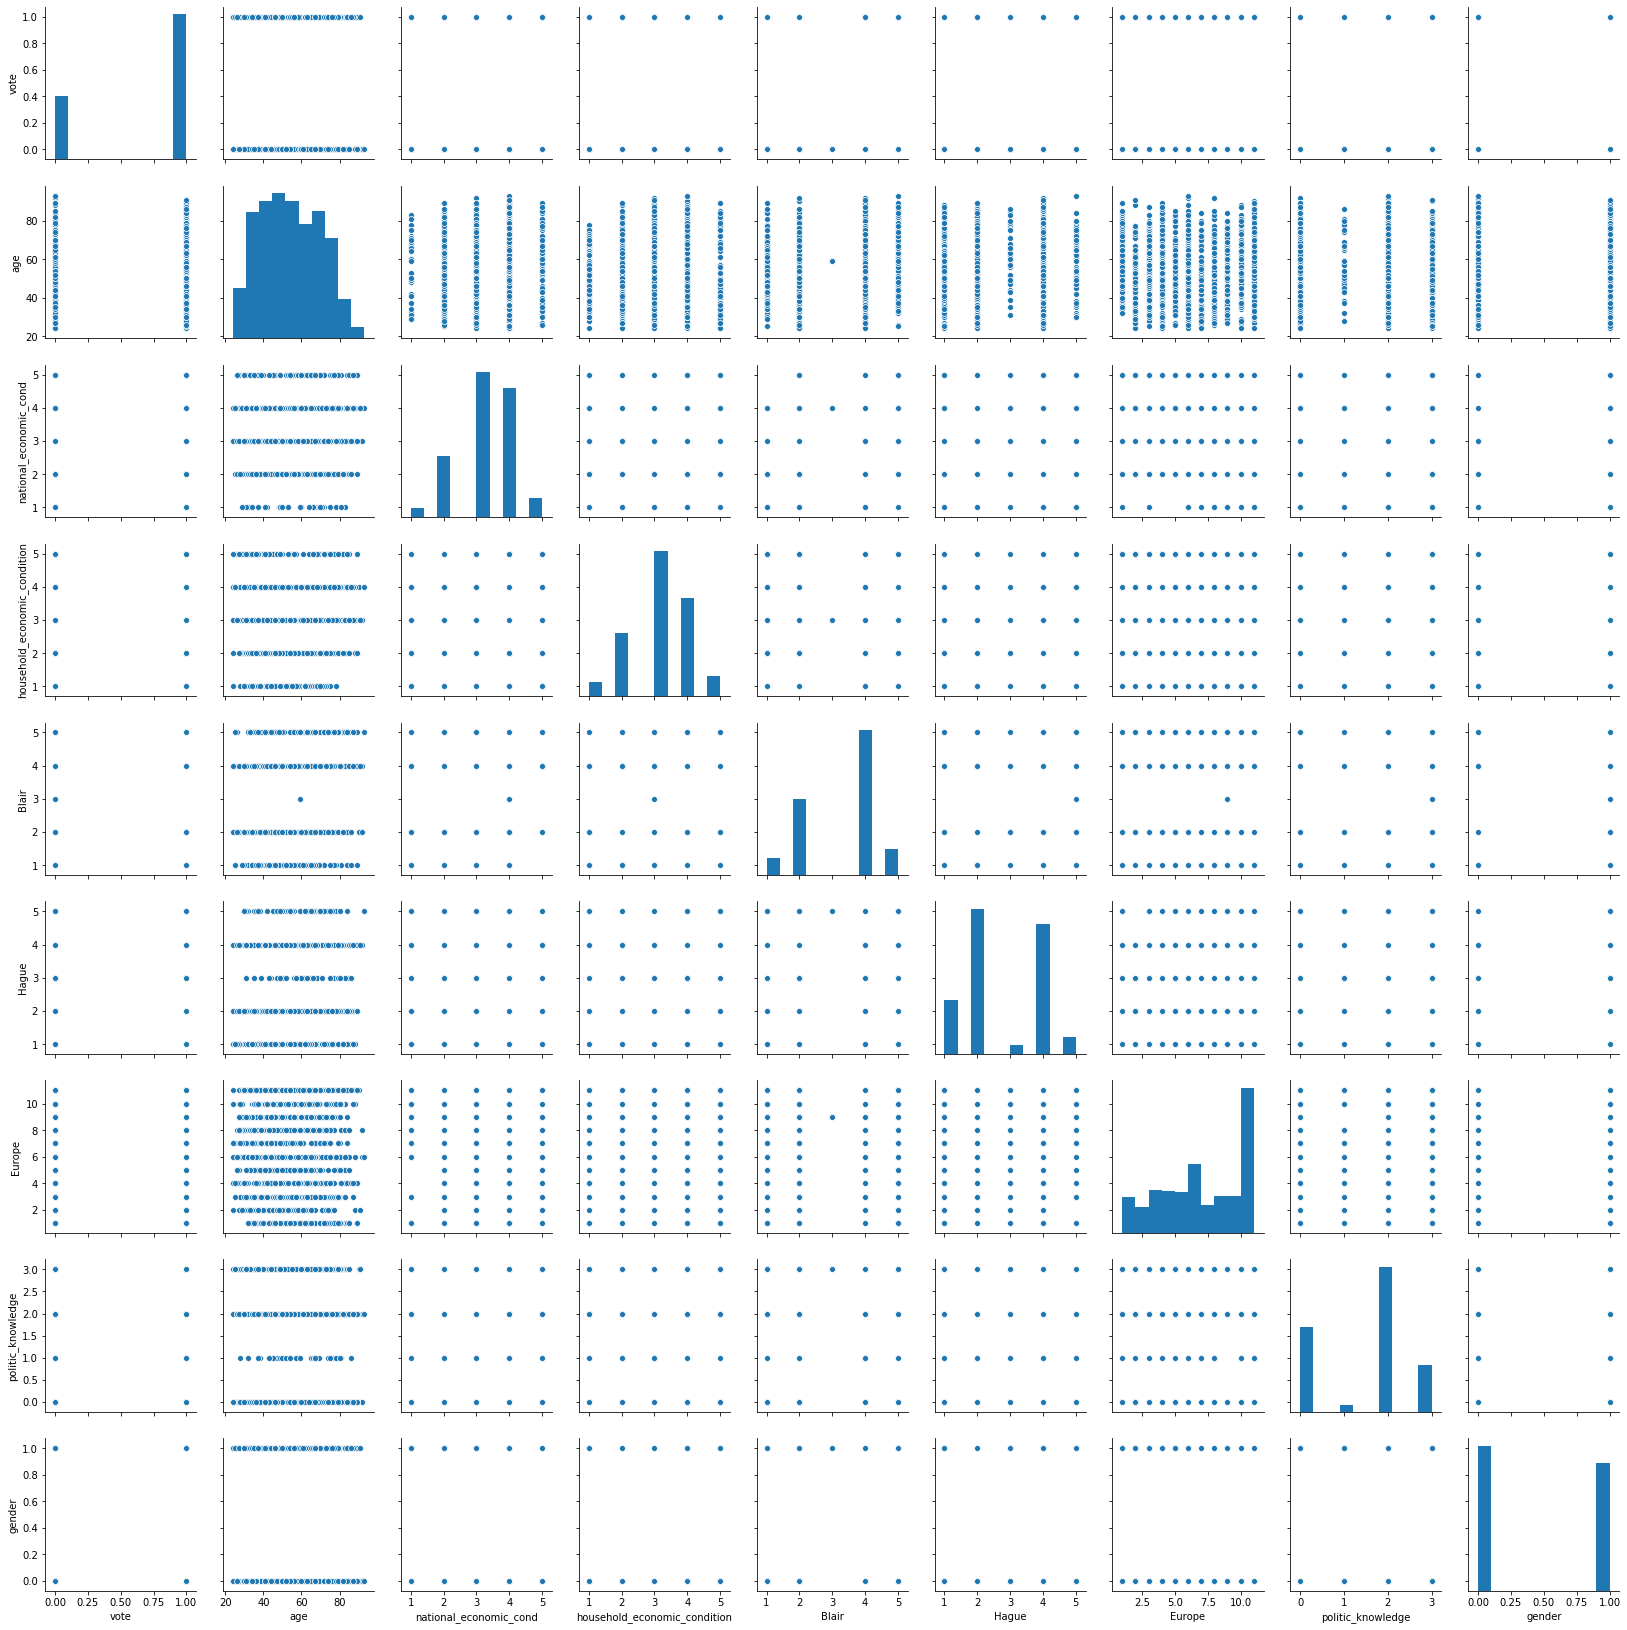

In [27]:
sns.pairplot(df)

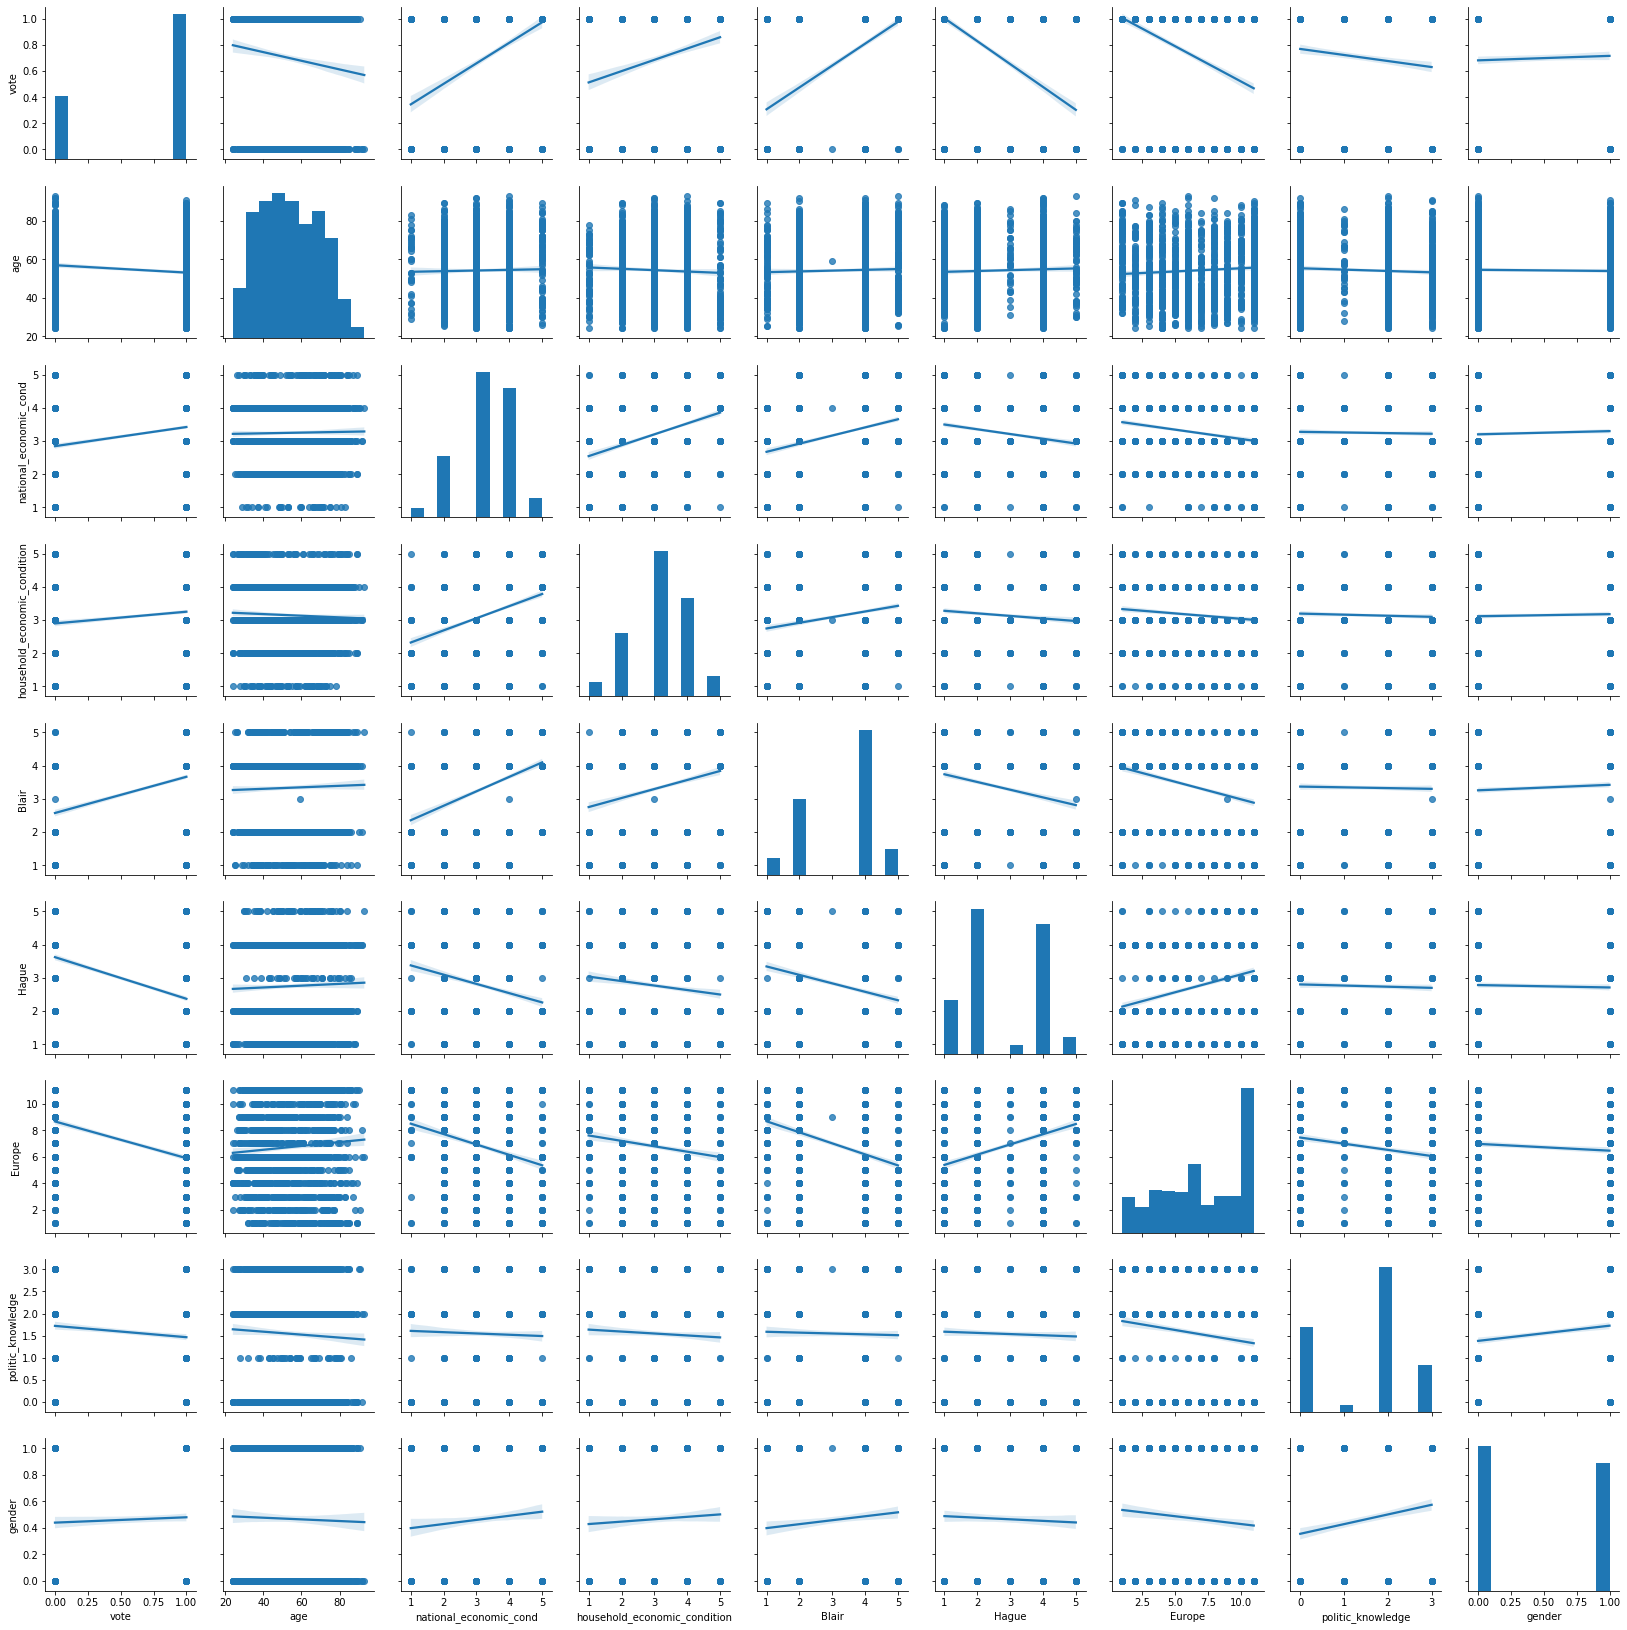

In [28]:
sns.pairplot(df, kind ='reg')

In [29]:
df.skew()

vote                           -0.858449
age                             0.144621
national_economic_cond         -0.240453
household_economic_condition   -0.149552
Blair                          -0.535419
Hague                           0.152100
Europe                         -0.135947
politic_knowledge              -0.426838
gender                          0.130239
dtype: float64

In [30]:
df.corr()

,vote,age,national_economic_cond,household_economic_condition,Blair,Hague,Europe,politic_knowledge,gender
vote,1.000000,-0.112821,0.300737,0.174726,0.427084,-0.468508,-0.385443,-0.108653,0.037191
age,-0.112821,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490,-0.019746
national_economic_cond,0.300737,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624,0.054726
household_economic_condition,0.174726,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810,0.033853
Blair,0.427084,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917,0.070001
Hague,-0.468508,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354,-0.029408
Europe,-0.385443,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364,-0.077520
politic_knowledge,-0.108653,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000,0.158181
gender,0.037191,-0.019746,0.054726,0.033853,0.070001,-0.029408,-0.077520,0.158181,1.000000


In [31]:
df.cov()

,vote,age,national_economic_cond,household_economic_condition,Blair,Hague,Europe,politic_knowledge,gender
vote,0.211310,-0.814816,0.121789,0.074693,0.230646,-0.265052,-0.584266,-0.054107,0.008533
age,-0.814816,246.842075,0.256981,-0.607619,0.557762,0.669531,3.568550,-0.825301,-0.154840
national_economic_cond,0.121789,0.256981,0.776107,0.283712,0.338314,-0.216589,-0.608397,-0.022546,0.024063
household_economic_condition,0.074693,-0.607619,0.283712,0.864810,0.235192,-0.116689,-0.352299,-0.038091,0.015713
Blair,0.230646,0.557762,0.338314,0.235192,1.380212,-0.351648,-1.147341,-0.026621,0.041046
Hague,-0.265052,0.669531,-0.216589,-0.116689,-0.351648,1.514631,1.166149,-0.040469,-0.018064
Europe,-0.584266,3.568550,-0.608397,-0.352299,-1.147341,1.166149,10.873759,-0.544285,-0.127584
politic_knowledge,-0.054107,-0.825301,-0.022546,-0.038091,-0.026621,-0.040469,-0.544285,1.173571,0.085527
gender,0.008533,-0.154840,0.024063,0.015713,0.041046,-0.018064,-0.127584,0.085527,0.249110


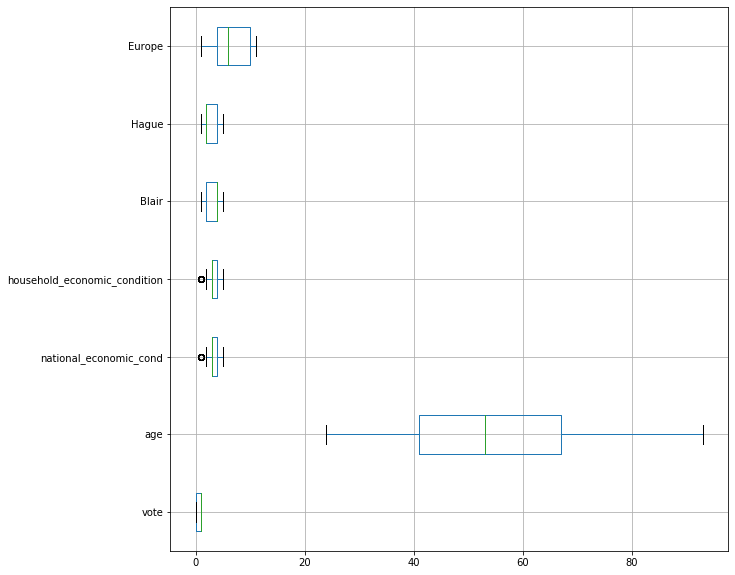

In [32]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.iloc[:,:7].boxplot(vert=0)
plt.show()

In [33]:
#Scaling
df.head()

,vote,age,national_economic_cond,household_economic_condition,Blair,Hague,Europe,politic_knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [34]:
#Scaling is not needed in this case
df.head()

,vote,age,national_economic_cond,household_economic_condition,Blair,Hague,Europe,politic_knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [35]:
# Train Test split
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df['vote']

In [36]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [38]:
logit_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',n_jobs=2)
logit_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')

In [39]:
ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [40]:
## Performance Matrix on train data set
y_train_predict = logit_model.predict(X_train)
model_score = logit_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8407699037620298
[[242 109]
 [ 73 719]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       351
           1       0.87      0.91      0.89       792

    accuracy                           0.84      1143
   macro avg       0.82      0.80      0.81      1143
weighted avg       0.84      0.84      0.84      1143



Text(0.5, 1, 'Confusion Matrix for training data of Logistic Regression model')

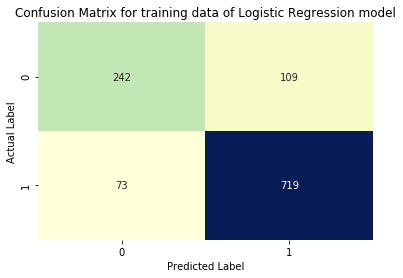

In [41]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of Logistic Regression model')

AUC for Logistic Regression training dataset: 0.889


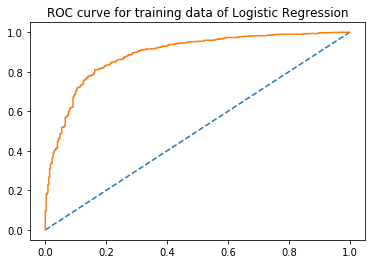

In [42]:
# predict probabilities
probs = logit_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_logit = roc_auc_score(y_train, probs)
print('AUC for Logistic Regression training dataset: %.3f' % train_auc_logit)
# calculate roc curve
train_fpr_logit, train_tpr_logit, train_thresholds_logit = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of Logistic Regression')
plt.plot(train_fpr_logit, train_tpr_logit)

In [43]:
## Performance Matrix on test data set
y_test_predict = logit_model.predict(X_test)
model_score = logit_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8219895287958116
[[ 74  37]
 [ 31 240]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       111
           1       0.87      0.89      0.88       271

    accuracy                           0.82       382
   macro avg       0.79      0.78      0.78       382
weighted avg       0.82      0.82      0.82       382



Text(0.5, 1, 'Confusion Matrix for testing data of Logistic Regression model')

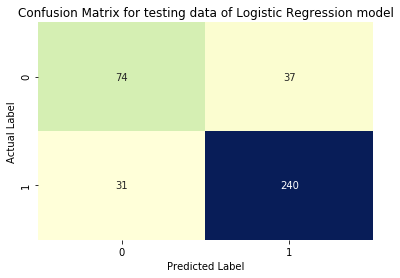

In [44]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of Logistic Regression model')

AUC for Logistic Regression testing dataset: 0.887


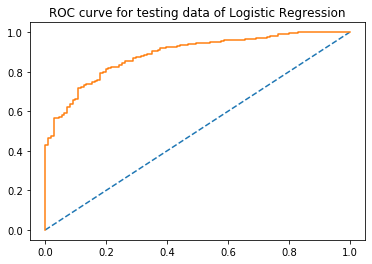

In [45]:
# predict probabilities
probs2 = logit_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
test_auc_logit = roc_auc_score(y_test, probs2)
print('AUC for Logistic Regression testing dataset: %.3f' % test_auc_logit)
# calculate roc curve
test_fpr_logit, test_tpr_logit, test_thresholds_logit = roc_curve(y_test, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of Logistic Regression')
plt.plot(test_fpr_logit, test_tpr_logit)

In [47]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [48]:
## Performance Matrix on train data set
y_train_predict1 = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict1))
print(metrics.classification_report(y_train, y_train_predict1))

0.8372703412073491
[[246 105]
 [ 81 711]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       351
           1       0.87      0.90      0.88       792

    accuracy                           0.84      1143
   macro avg       0.81      0.80      0.80      1143
weighted avg       0.83      0.84      0.84      1143



Text(0.5, 1, 'Confusion Matrix for training data of LDA model')

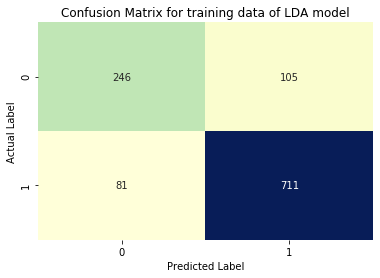

In [49]:
sns.heatmap(confusion_matrix(y_train, y_train_predict1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of LDA model')

AUC for LDA training datset: 0.888


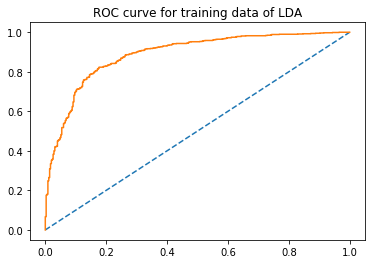

In [50]:
# predict probabilities
probs3 = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs3 = probs3[:, 1]
# calculate AUC
train_auc_lda = roc_auc_score(y_train, probs3)
print('AUC for LDA training datset: %.3f' % train_auc_lda)
# calculate roc curve
train_fpr_lda, train_tpr_lda, train_thresholds_lda = roc_curve(y_train, probs3)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of LDA')
plt.plot(train_fpr_lda, train_tpr_lda)

In [51]:
## Performance Matrix on test data set
y_test_predict1 = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict1))
print(metrics.classification_report(y_test, y_test_predict1))

0.824607329842932
[[ 76  35]
 [ 32 239]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       111
           1       0.87      0.88      0.88       271

    accuracy                           0.82       382
   macro avg       0.79      0.78      0.79       382
weighted avg       0.82      0.82      0.82       382



Text(0.5, 1, 'Confusion Matrix for testing data of LDA model')

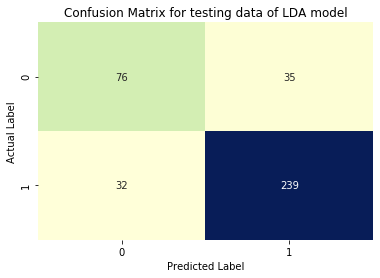

In [52]:
sns.heatmap(confusion_matrix(y_test, y_test_predict1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of LDA model')

AUC for LDA testing dataset: 0.888


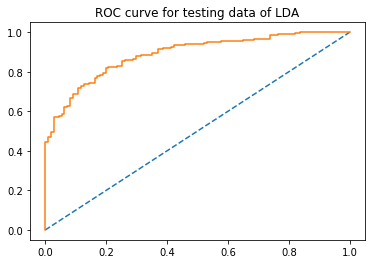

In [53]:
# predict probabilities
probs4 = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs4 = probs4[:, 1]
# calculate AUC
test_auc_lda = roc_auc_score(y_test, probs4)
print('AUC for LDA testing dataset: %.3f' % test_auc_lda)
# calculate roc curve
test_fpr_lda, test_tpr_lda, test_thresholds_lda = roc_curve(y_test, probs4)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of LDA')
plt.plot(test_fpr_lda, test_tpr_lda)

In [54]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
## Performance Matrix on train data set
y_train_predict2 = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict2))
print(metrics.classification_report(y_train, y_train_predict2))

0.8573928258967629
[[257  94]
 [ 69 723]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       351
           1       0.88      0.91      0.90       792

    accuracy                           0.86      1143
   macro avg       0.84      0.82      0.83      1143
weighted avg       0.86      0.86      0.86      1143



Text(0.5, 1, 'Confusion Matrix for training data of KNN model')

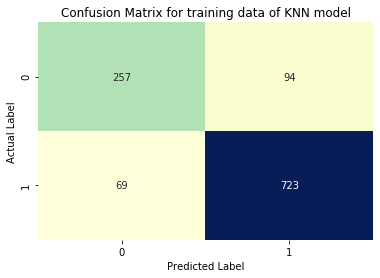

In [56]:
sns.heatmap(confusion_matrix(y_train, y_train_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of KNN model')

AUC for KNN trainnig dataset: 0.925


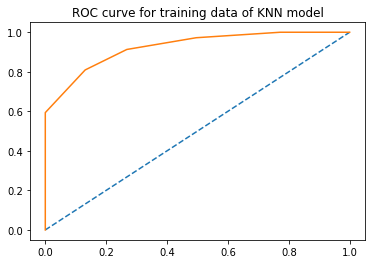

In [57]:
# predict probabilities
probs5 = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs5 = probs5[:, 1]
# calculate AUC
train_auc_KNN = roc_auc_score(y_train, probs5)
print('AUC for KNN trainnig dataset: %.3f' % train_auc_KNN)
# calculate roc curve
train_fpr_KNN, train_tpr_KNN, train_thresholds_KNN = roc_curve(y_train, probs5)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of KNN model')
plt.plot(train_fpr_KNN, train_tpr_KNN)

In [58]:
## Performance Matrix on test data set
y_test_predict2 = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict2))
print(metrics.classification_report(y_test, y_test_predict2))

0.7696335078534031
[[ 68  43]
 [ 45 226]]
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       111
           1       0.84      0.83      0.84       271

    accuracy                           0.77       382
   macro avg       0.72      0.72      0.72       382
weighted avg       0.77      0.77      0.77       382



Text(0.5, 1, 'Confusion Matrix for testing data of KNN model')

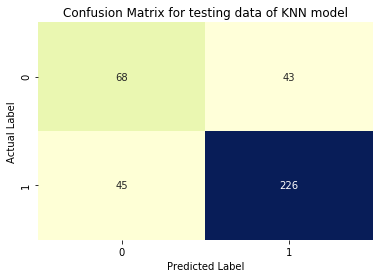

In [59]:
sns.heatmap(confusion_matrix(y_test, y_test_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of KNN model')

AUC for KNN testing dataset: 0.824


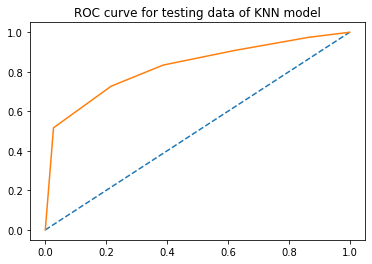

In [60]:
# predict probabilities
probs6 = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs6 = probs6[:, 1]
# calculate AUC
test_auc_KNN = roc_auc_score(y_test, probs6)
print('AUC for KNN testing dataset: %.3f' % test_auc_KNN)
# calculate roc curve
test_fpr_KNN, test_tpr_KNN, test_thresholds_KNN = roc_curve(y_test, probs6)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of KNN model')
plt.plot(test_fpr_KNN, test_tpr_KNN)

In [61]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [62]:
## Performance Matrix on train data set
y_train_predict3 = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict3))
print(metrics.classification_report(y_train, y_train_predict3))

0.8311461067366579
[[252  99]
 [ 94 698]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       351
           1       0.88      0.88      0.88       792

    accuracy                           0.83      1143
   macro avg       0.80      0.80      0.80      1143
weighted avg       0.83      0.83      0.83      1143



Text(0.5, 1, 'Confusion Matrix for training data of NaiveBayes model')

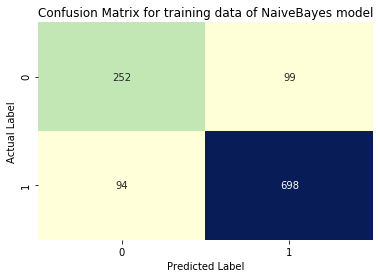

In [63]:
sns.heatmap(confusion_matrix(y_train, y_train_predict3),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of NaiveBayes model')

AUC for NaivaBayes training dataset: 0.886


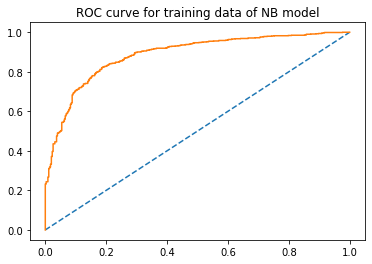

In [64]:
# predict probabilities
probs7 = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs7 = probs7[:, 1]
# calculate AUC
train_auc_NB = roc_auc_score(y_train, probs7)
print('AUC for NaivaBayes training dataset: %.3f' % train_auc_NB)
# calculate roc curve
train_fpr_NB, train_tpr_NB, train_thresholds_NB = roc_curve(y_train, probs7)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of NB model')
plt.plot(train_fpr_NB, train_tpr_NB)

In [65]:
## Performance Matrix on test data set
y_test_predict3 = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict3))
print(metrics.classification_report(y_test, y_test_predict3))

0.8272251308900523
[[ 82  29]
 [ 37 234]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       111
           1       0.89      0.86      0.88       271

    accuracy                           0.83       382
   macro avg       0.79      0.80      0.79       382
weighted avg       0.83      0.83      0.83       382



Text(0.5, 1, 'Confusion Matrix for testing data of NaiveBayes model')

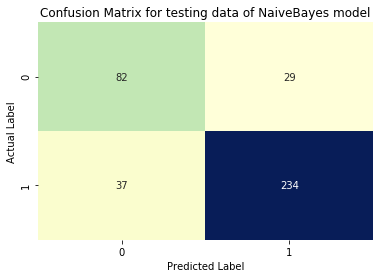

In [66]:
sns.heatmap(confusion_matrix(y_test, y_test_predict3),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of NaiveBayes model')

AUC for NaiveBayes testing dataset: 0.887


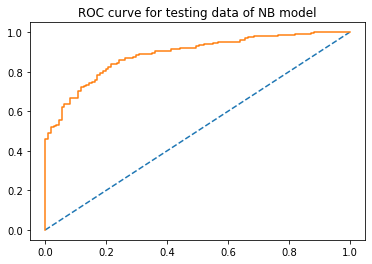

In [67]:
# predict probabilities
probs8 = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs8 = probs8[:, 1]
# calculate AUC
test_auc_NB = roc_auc_score(y_test, probs8)
print('AUC for NaiveBayes testing dataset: %.3f' % test_auc_NB)
# calculate roc curve
test_fpr_NB, test_tpr_NB, test_thresholds_NB = roc_curve(y_test, probs8)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of NB model')
plt.plot(test_fpr_NB, test_tpr_NB)

In [68]:
# Support Vector Machine
from sklearn import svm

SVM_model= svm.SVC(probability = True, random_state=1)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [69]:
## Performance Matrix on train data set
y_train_predict4 = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict4))
print(metrics.classification_report(y_train, y_train_predict4))

0.7882764654418197
[[148 203]
 [ 39 753]]
              precision    recall  f1-score   support

           0       0.79      0.42      0.55       351
           1       0.79      0.95      0.86       792

    accuracy                           0.79      1143
   macro avg       0.79      0.69      0.71      1143
weighted avg       0.79      0.79      0.77      1143



Text(0.5, 1, 'Confusion Matrix for training data of SVM model')

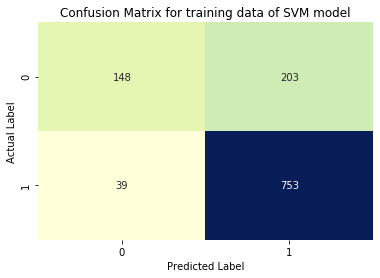

In [70]:
sns.heatmap(confusion_matrix(y_train, y_train_predict4),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of SVM model')

AUC for SVM training dataset: 0.872


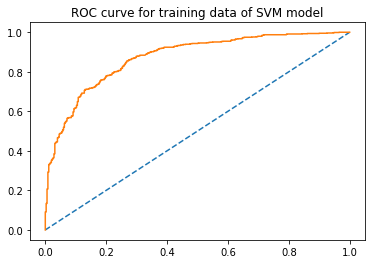

In [71]:
# predict probabilities
probs9 = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs9 = probs9[:, 1]
# calculate AUC
train_auc_SVM = roc_auc_score(y_train, probs9)
print('AUC for SVM training dataset: %.3f' % train_auc_SVM)
# calculate roc curve
train_fpr_SVM, train_tpr_SVM, train_thresholds_SVM= roc_curve(y_train, probs9)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of SVM model')
plt.plot(train_fpr_SVM, train_tpr_SVM)

In [72]:
## Performance Matrix on test data set
y_test_predict4 = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict4))
print(metrics.classification_report(y_test, y_test_predict4))

0.7958115183246073
[[ 46  65]
 [ 13 258]]
              precision    recall  f1-score   support

           0       0.78      0.41      0.54       111
           1       0.80      0.95      0.87       271

    accuracy                           0.80       382
   macro avg       0.79      0.68      0.70       382
weighted avg       0.79      0.80      0.77       382



Text(0.5, 1, 'Confusion Matrix for testing data of SVM model')

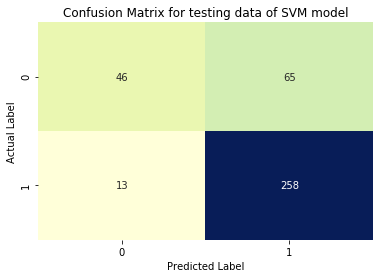

In [73]:
sns.heatmap(confusion_matrix(y_test, y_test_predict4),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of SVM model')

AUC for SVM testing dataset: 0.855856


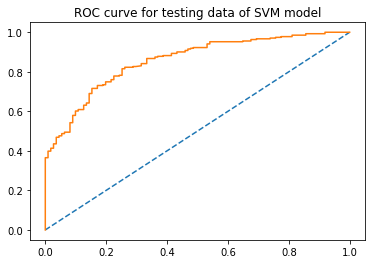

In [74]:
# predict probabilities
probs10 = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs10 = probs10[:, 1]
# calculate AUC
test_auc_SVM = roc_auc_score(y_test, probs10)
print('AUC for SVM testing dataset: %3f' % test_auc_SVM)
# calculate roc curve
test_fpr_SVM, test_tpr_SVM, test_thesholds_SVM = roc_curve(y_test, probs10)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of SVM model')
plt.plot(test_fpr_SVM, test_tpr_SVM)

In [75]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [76]:
## Performance Matrix on train data set
y_train_predict5 = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict5))
print(metrics.classification_report(y_train, y_train_predict5))

0.9991251093613298
[[350   1]
 [  0 792]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1143
   macro avg       1.00      1.00      1.00      1143
weighted avg       1.00      1.00      1.00      1143



Text(0.5, 1, 'Confusion Matrix for training data of Random Forest model')

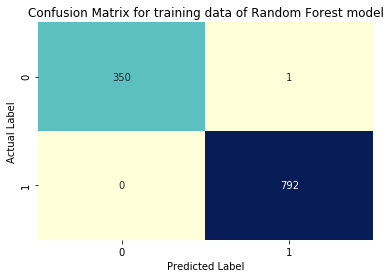

In [77]:
sns.heatmap(confusion_matrix(y_train, y_train_predict5),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of Random Forest model')

AUC for Random Fores training dataset: 1.000


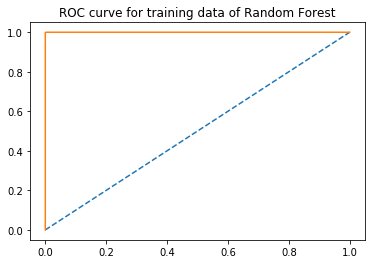

In [78]:
# predict probabilities
probs11 = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs11 = probs11[:, 1]
# calculate AUC
train_auc_RF = roc_auc_score(y_train, probs11)
print('AUC for Random Fores training dataset: %.3f' % train_auc_RF)
# calculate roc curve
train_fpr_RF, train_tpr_RF, train_thresholds_RF = roc_curve(y_train, probs11)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of Random Forest')
plt.plot(train_fpr_RF, train_tpr_RF)

In [79]:
## Performance Matrix on test data set
y_test_predict5 = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict5))
print(metrics.classification_report(y_test, y_test_predict5))

0.819371727748691
[[ 77  34]
 [ 35 236]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       111
           1       0.87      0.87      0.87       271

    accuracy                           0.82       382
   macro avg       0.78      0.78      0.78       382
weighted avg       0.82      0.82      0.82       382



Text(0.5, 1, 'Confusion Matrix for testing data of Random Forest model')

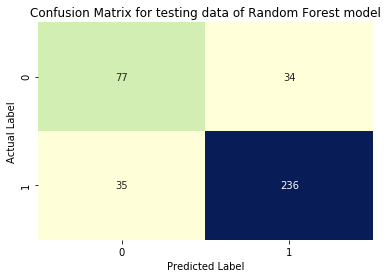

In [80]:
sns.heatmap(confusion_matrix(y_test, y_test_predict5),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of Random Forest model')

AUC for Random Forest testing dataset: 0.891


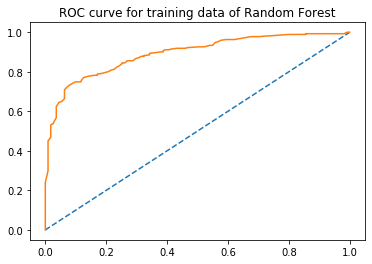

In [81]:
# predict probabilities
probs12 = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs12 = probs12[:, 1]
# calculate AUC
test_auc_RF = roc_auc_score(y_test, probs12)
print('AUC for Random Forest testing dataset: %.3f' % test_auc_RF)
# calculate roc curve
test_fpr_RF, test_tpr_RF, test_thresholds_RF = roc_curve(y_test, probs12)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of Random Forest')
plt.plot(test_fpr_RF, test_tpr_RF)

In [82]:
# Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
rf = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rf,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [83]:
## Performance Matrix on train data set
y_train_predict6 = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict6))
print(metrics.classification_report(y_train, y_train_predict6))

0.9676290463692039
[[323  28]
 [  9 783]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       351
           1       0.97      0.99      0.98       792

    accuracy                           0.97      1143
   macro avg       0.97      0.95      0.96      1143
weighted avg       0.97      0.97      0.97      1143



Text(0.5, 1, 'Confusion Matrix for training data of Bagging model')

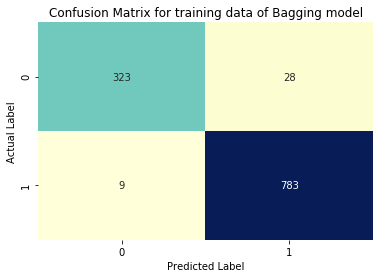

In [84]:
sns.heatmap(confusion_matrix(y_train, y_train_predict6),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of Bagging model')

AUC for Bagging training dataset: 0.997


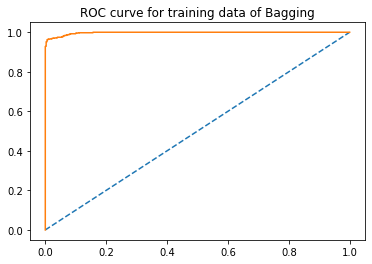

In [85]:
# predict probabilities
probs13 = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs13 = probs13[:, 1]
# calculate AUC
train_auc_Bagg = roc_auc_score(y_train, probs13)
print('AUC for Bagging training dataset: %.3f' % train_auc_Bagg)
# calculate roc curve
train_fpr_Bagg, train_tpr_Bagg, train_thresholds_Bagg = roc_curve(y_train, probs13)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of Bagging')
plt.plot(train_fpr_Bagg, train_tpr_Bagg)

In [86]:
## Performance Matrix on test data set
y_test_predict6 = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict6))
print(metrics.classification_report(y_test, y_test_predict6))

0.8298429319371727
[[ 78  33]
 [ 32 239]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       111
           1       0.88      0.88      0.88       271

    accuracy                           0.83       382
   macro avg       0.79      0.79      0.79       382
weighted avg       0.83      0.83      0.83       382



Text(0.5, 1, 'Confusion Matrix for testing data of Bagging model')

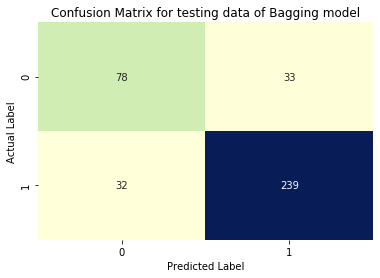

In [87]:
sns.heatmap(confusion_matrix(y_test, y_test_predict6),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of Bagging model')

AUC for Bagging testing dataset: 0.898


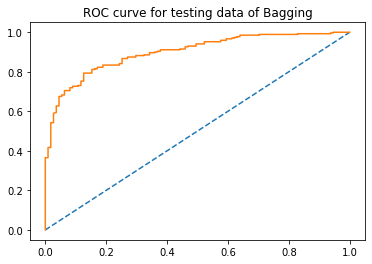

In [88]:
# predict probabilities
probs14 = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs14 = probs14[:, 1]
# calculate AUC
test_auc_Bagg = roc_auc_score(y_test, probs14)
print('AUC for Bagging testing dataset: %.3f' % test_auc_Bagg)
# calculate roc curve
test_fpr_Bagg, test_tpr_Bagg, test_thresholds_Bagg = roc_curve(y_test, probs14)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of Bagging')
plt.plot(test_fpr_Bagg, test_tpr_Bagg)

In [89]:
# ADA BOOST
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [90]:
## Performance Matrix on train data set
y_train_predict7 = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict7))
print(metrics.classification_report(y_train, y_train_predict7))

0.8486439195100612
[[252  99]
 [ 74 718]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       351
           1       0.88      0.91      0.89       792

    accuracy                           0.85      1143
   macro avg       0.83      0.81      0.82      1143
weighted avg       0.85      0.85      0.85      1143



Text(0.5, 1, 'Confusion Matrix for training data of ADABoost model')

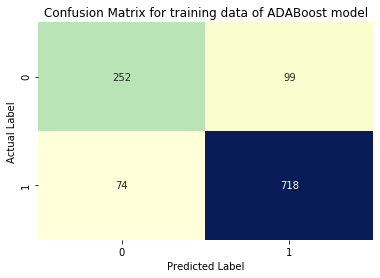

In [91]:
sns.heatmap(confusion_matrix(y_train, y_train_predict7),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of ADABoost model')

AUC for ADABoost training dataset : 0.912


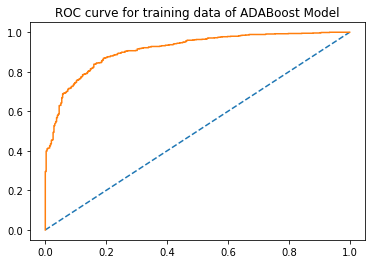

In [92]:
# predict probabilities
probs15 = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs15 = probs15[:, 1]
# calculate AUC
train_auc_ADB = roc_auc_score(y_train, probs15)
print('AUC for ADABoost training dataset : %.3f' % train_auc_ADB)
# calculate roc curve
train_fpr_ADB, train_tpr_ADB, train_thresholds_ADB = roc_curve(y_train,probs15)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of ADABoost Model')
plt.plot(train_fpr_ADB, train_tpr_ADB)

In [93]:
## Performance Matrix on test data set
y_test_predict7 = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict7))
print(metrics.classification_report(y_test, y_test_predict7))

0.8167539267015707
[[ 78  33]
 [ 37 234]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       111
           1       0.88      0.86      0.87       271

    accuracy                           0.82       382
   macro avg       0.78      0.78      0.78       382
weighted avg       0.82      0.82      0.82       382



Text(0.5, 1, 'Confusion Matrix for testing data of ADABoost model')

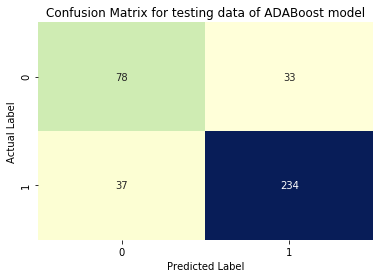

In [94]:
sns.heatmap(confusion_matrix(y_test, y_test_predict7),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of ADABoost model')

AUC for ADABoost testing dataset: 0.885


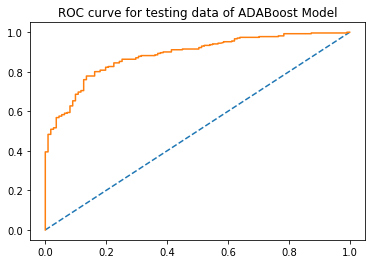

In [95]:
# predict probabilities
probs16 = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs16 = probs16[:, 1]
# calculate AUC
test_auc_ADB = roc_auc_score(y_test,probs16)
print('AUC for ADABoost testing dataset: %.3f' % test_auc_ADB)
# calculate roc curve
test_fpr_ADB, test_tpr_ADB, test_thresholds_ADB = roc_curve(y_test,probs16)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of ADABoost Model')
plt.plot(test_fpr_ADB, test_tpr_ADB)

In [96]:
## XGBoost
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
## Performance Matrix on train data set
y_train_predict8 = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict8))
print(metrics.classification_report(y_train, y_train_predict8))

0.8853893263342082
[[274  77]
 [ 54 738]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       351
           1       0.91      0.93      0.92       792

    accuracy                           0.89      1143
   macro avg       0.87      0.86      0.86      1143
weighted avg       0.88      0.89      0.88      1143



Text(0.5, 1, 'Confusion Matrix for training data of XGBoost model')

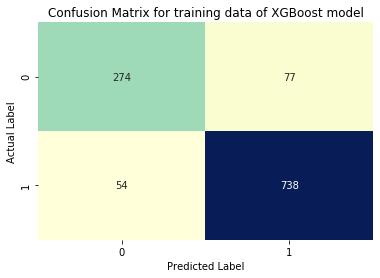

In [98]:
sns.heatmap(confusion_matrix(y_train, y_train_predict8),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of XGBoost model')